In [1]:
import numpy as np
from model import Model
import torch
from torch.utils.data import DataLoader
from celeba_dataset import CelebaDataset, IMG_SHAPE, data_transforms

import matplotlib.pyplot as plt

In [13]:
DATA_DIR = '../data'
MODEL_PATH = '../models/attempt7/epoch10'
ANNOTATION_DATA_PATH = f'{DATA_DIR}/list_attr_celeba.csv'
DATA_PATH = f'{DATA_DIR}/img_align_celeba'


In [14]:
dataset = CelebaDataset(ANNOTATION_DATA_PATH, DATA_PATH, transform=data_transforms)
all_labels = np.array(list(dataset.labels))

VAE_PARAMS = {
    'latent_dim_size': 8,
    'data_shape': IMG_SHAPE,
    'label_shape': len(dataset.labels)
}

In [15]:
m = Model.load(MODEL_PATH)
#m = torch.load(MODEL_PATH, map_location=torch.device('cpu'))
#m = Model(VAE_PARAMS)

Model parameters: 1981148


In [16]:
def reconstruction(dataset, example_count=8):
    dataloader = DataLoader(dataset, example_count, shuffle=True)
    data_x, data_y = next(iter(dataloader))
    decoded = m.transform(data_x, data_y).detach().numpy()
    print(decoded.shape)
    print(all_labels)
    fig, ax = plt.subplots(example_count, 2, figsize=(10, 10))
    for i in range(example_count):
        pic, labels = data_x[i], data_y[i]
        l_i = list(map(lambda z: bool(z), labels.numpy()))
        labels_txt = ', '.join(all_labels[l_i])
        ax[i, 0].imshow(np.moveaxis(np.array(pic), 0, -1))
        ax[i, 0].set_title(labels_txt)
        ax[i, 0].axis('off')
        print(pic)
        print(decoded[i])
        ax[i, 1].imshow(np.moveaxis(decoded[i], 0, -1))
        #ax[i, 1].set_title(labels_txt)
        ax[i, 1].axis('off')
    plt.show()

(5, 3, 224, 184)
['5_o_Clock_Shadow' 'Arched_Eyebrows' 'Attractive' 'Bags_Under_Eyes'
 'Bald' 'Bangs' 'Big_Lips' 'Big_Nose' 'Black_Hair' 'Blond_Hair' 'Blurry'
 'Brown_Hair' 'Bushy_Eyebrows' 'Chubby' 'Double_Chin' 'Eyeglasses'
 'Goatee' 'Gray_Hair' 'Heavy_Makeup' 'High_Cheekbones' 'Male'
 'Mouth_Slightly_Open' 'Mustache' 'Narrow_Eyes' 'No_Beard' 'Oval_Face'
 'Pale_Skin' 'Pointy_Nose' 'Receding_Hairline' 'Rosy_Cheeks' 'Sideburns'
 'Smiling' 'Straight_Hair' 'Wavy_Hair' 'Wearing_Earrings' 'Wearing_Hat'
 'Wearing_Lipstick' 'Wearing_Necklace' 'Wearing_Necktie' 'Young']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tensor([[[ 0.6049,  0.6049,  0.6049,  ..., -1.0219, -1.0219, -1.0219],
         [ 0.6049,  0.6049,  0.6049,  ..., -1.0219, -1.0219, -1.0219],
         [ 0.6049,  0.6049,  0.6049,  ..., -1.0219, -1.0219, -1.0219],
         ...,
         [ 1.9407,  1.9407,  1.9407,  ..., -1.5528, -1.5528, -1.5528],
         [ 1.9407,  1.9407,  1.9407,  ..., -1.5528, -1.5528, -1.5528],
         [ 1.9407,  1.9407,  1.9407,  ..., -1.5528, -1.5528, -1.5528]],

        [[ 0.5203,  0.5203,  0.5203,  ..., -1.1779, -1.1779, -1.1779],
         [ 0.5203,  0.5203,  0.5203,  ..., -1.1779, -1.1779, -1.1779],
         [ 0.5203,  0.5203,  0.5203,  ..., -1.1779, -1.1779, -1.1779],
         ...,
         [ 1.4132,  1.4132,  1.4132,  ..., -1.5630, -1.5630, -1.5630],
         [ 1.4132,  1.4132,  1.4132,  ..., -1.5630, -1.5630, -1.5630],
         [ 1.4132,  1.4132,  1.4132,  ..., -1.5630, -1.5630, -1.5630]],

        [[ 0.1825,  0.1825,  0.1825,  ..., -1.0027, -1.0027, -1.0027],
         [ 0.1825,  0.1825,  0.1825,  ..., -1

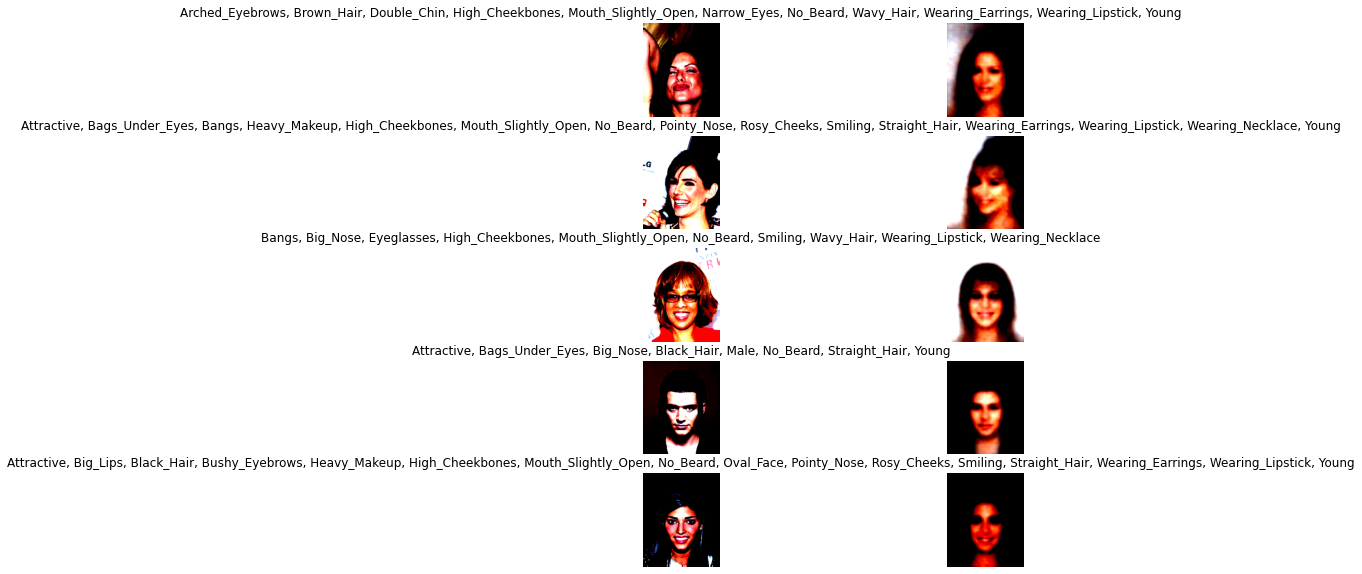

In [17]:
reconstruction(dataset, 5)

In [18]:
def creation(labels):
    labels_encoded = [[1 if l in labels else 0 for l in all_labels]]
    generated = m.generate_random_with_label(labels_encoded).detach().numpy()[0]
    print(generated)
    plt.imshow(np.moveaxis(generated, 0, -1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.06256235  0.06256235  0.11513191 ...  0.38128895  0.3517387
    0.3517387 ]
  [ 0.06256235  0.06256235  0.11513191 ...  0.38128895  0.3517387
    0.3517387 ]
  [ 0.07983232  0.07983232  0.08139396 ...  0.3921603   0.40289342
    0.40289342]
  ...
  [-0.18265684 -0.18265684 -0.17789078 ... -0.7402296  -0.69814706
   -0.69814706]
  [-0.18746184 -0.18746184 -0.16128322 ... -0.75792134 -0.64897835
   -0.64897835]
  [-0.18746184 -0.18746184 -0.16128322 ... -0.75792134 -0.64897835
   -0.64897835]]

 [[ 0.06360346  0.06360346  0.13744867 ...  0.4381054   0.34150797
    0.34150797]
  [ 0.06360346  0.06360346  0.13744867 ...  0.4381054   0.34150797
    0.34150797]
  [ 0.09157026  0.09157026  0.09690702 ...  0.4194926   0.37905592
    0.37905592]
  ...
  [-0.33751816 -0.33751816 -0.35796362 ... -0.8445338  -0.81795144
   -0.81795144]
  [-0.3588907  -0.3588907  -0.3597008  ... -0.85527563 -0.7763552
   -0.7763552 ]
  [-0.3588907  -0.3588907  -0.3597008  ... -0.85527563 -0.7763552
   -0.7763

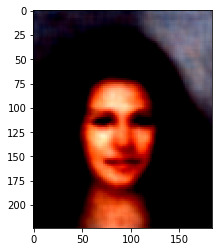

In [28]:
creation([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.01868871 -0.01868871  0.03250113 ...  0.23751652  0.20906085
    0.20906085]
  [-0.01868871 -0.01868871  0.03250113 ...  0.23751652  0.20906085
    0.20906085]
  [-0.00922152 -0.00922152  0.00216106 ...  0.23294157  0.23682112
    0.23682112]
  ...
  [ 0.02855957  0.02855957  0.04563645 ... -0.9112241  -0.8616246
   -0.8616246 ]
  [ 0.00976911  0.00976911  0.07253522 ... -0.9299509  -0.7863983
   -0.7863983 ]
  [ 0.00976911  0.00976911  0.07253522 ... -0.9299509  -0.7863983
   -0.7863983 ]]

 [[-0.02952069 -0.02952069  0.03992486 ...  0.2653045   0.17730194
    0.17730194]
  [-0.02952069 -0.02952069  0.03992486 ...  0.2653045   0.17730194
    0.17730194]
  [-0.01458466 -0.01458466 -0.00127023 ...  0.23308921  0.19103783
    0.19103783]
  ...
  [-0.12469128 -0.12469128 -0.14325568 ... -1.0255823  -0.9892261
   -0.9892261 ]
  [-0.16354114 -0.16354114 -0.13962227 ... -1.034573   -0.9230406
   -0.9230406 ]
  [-0.16354114 -0.16354114 -0.13962227 ... -1.034573   -0.9230406
   -0.923040

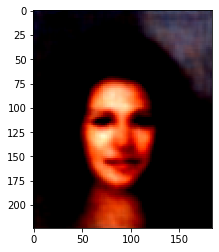

In [20]:
creation(['Arched_Eyebrows'])